# **Train UnetClassifier**

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "7"
DEVICE = 'cuda'

import torch.optim as optim
import torch.nn.functional as F 
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

def history_plot(train,val,metric):
    
    plt.figure(figsize=(12, 6))
    plt.plot(train)
    plt.plot(val)
    plt.title('log')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    
# เพิ่ม . 
def add_dot(df):
    cols = ['filename','mask_filename']
    for i in cols :
        #df[i] = df[i].apply(lambda x: '.' + x[1:])
        df[i] = df[i].str.replace('./dataset', '../dataset')
    return df

def encoder_class(dataframe):
    
    encoder = {'benign':1, 'malignant':2, 'normal':0}
    dataframe['class'] = [encoder[i] for i in dataframe['category']]
    
    return dataframe

In [17]:
train_path = '../dataset/unet/dataset-train-augment.csv'
train_df = pd.read_csv(train_path)
train_df = add_dot(train_df)

val_path = '../dataset/unet/dataset-validate-augment.csv'
val_df = pd.read_csv(val_path)
val_df = add_dot(val_df)

test_path = '../dataset/unet/dataset-test-augment.csv'
test_df = pd.read_csv(test_path)
test_df = add_dot(test_df)

train_df = encoder_class(train_df)
val_df = encoder_class(val_df)
print(train_df['category'].value_counts())
print(train_df['class'].value_counts())
print(val_df['category'].value_counts())
print(val_df['class'].value_counts())

category
benign       845
malignant    845
normal       845
Name: count, dtype: int64
class
1    845
2    845
0    845
Name: count, dtype: int64
category
benign       121
malignant    121
normal       121
Name: count, dtype: int64
class
1    121
2    121
0    121
Name: count, dtype: int64


In [3]:
# prepare loss and dataset
import DataLoad 
train_loader = DataLoad.get_data(train_df,16)
val_loader = DataLoad.get_data(val_df,16)
loss_func = nn.CrossEntropyLoss()

In [4]:
from train import fit
model , loss_train , loss_val , loss_acc = fit(train_loader=train_loader,
                                               val_loader=val_loader,
                                               loss_func=loss_func , 
                                               model=None,
                                               num_epochs=100 , 
                                               learning_rate=0.00025 , 
                                               model_save=True , 
                                               update_lr=True,
                                               device=DEVICE)

Epoch [0/100]: 100%|██████████| 159/159 [00:19<00:00,  8.16it/s, loss=0.939]


Model saved!
Epoch 1/100 => Train Loss: 0.8870,
Validation Loss: 0.7197 , Validate Accuracy 0.8733 
------------------------------------------------------------------------------------------


Epoch [1/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.868]


Model saved!
Epoch 2/100 => Train Loss: 0.8364,
Validation Loss: 0.8742 , Validate Accuracy 0.8898 
------------------------------------------------------------------------------------------


Epoch [2/100]: 100%|██████████| 159/159 [00:19<00:00,  8.22it/s, loss=0.802]


Model saved!
Epoch 3/100 => Train Loss: 0.8116,
Validation Loss: 0.9023 , Validate Accuracy 0.9008 
------------------------------------------------------------------------------------------


Epoch [3/100]: 100%|██████████| 159/159 [00:19<00:00,  8.12it/s, loss=0.745]


Model saved!
Epoch 4/100 => Train Loss: 0.7932,
Validation Loss: 0.7471 , Validate Accuracy 0.9036 
------------------------------------------------------------------------------------------


Epoch [4/100]: 100%|██████████| 159/159 [00:19<00:00,  8.32it/s, loss=0.734]


Model saved!
Epoch 5/100 => Train Loss: 0.7822,
Validation Loss: 0.8251 , Validate Accuracy 0.9091 
------------------------------------------------------------------------------------------


Epoch [5/100]: 100%|██████████| 159/159 [00:19<00:00,  8.34it/s, loss=0.922]


Model saved!
Epoch 6/100 => Train Loss: 0.7669,
Validation Loss: 0.6831 , Validate Accuracy 0.9118 
------------------------------------------------------------------------------------------


Epoch [6/100]: 100%|██████████| 159/159 [00:18<00:00,  8.37it/s, loss=0.662]


Model saved!
Epoch 7/100 => Train Loss: 0.7558,
Validation Loss: 0.7536 , Validate Accuracy 0.9146 
------------------------------------------------------------------------------------------


Epoch [7/100]: 100%|██████████| 159/159 [00:19<00:00,  8.20it/s, loss=0.754]


Epoch 8/100 => Train Loss: 0.7485,
Validation Loss: 0.7540 , Validate Accuracy 0.9063 
------------------------------------------------------------------------------------------


Epoch [8/100]: 100%|██████████| 159/159 [00:19<00:00,  8.26it/s, loss=0.645]


Model saved!
Epoch 9/100 => Train Loss: 0.7399,
Validation Loss: 0.7978 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [9/100]: 100%|██████████| 159/159 [00:19<00:00,  8.21it/s, loss=0.715]


Epoch 10/100 => Train Loss: 0.7273,
Validation Loss: 0.6926 , Validate Accuracy 0.9118 
------------------------------------------------------------------------------------------


Epoch [10/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=1.05] 


Epoch 11/100 => Train Loss: 0.7201,
Validation Loss: 0.8190 , Validate Accuracy 0.9091 
------------------------------------------------------------------------------------------


Epoch [11/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.773]


Epoch 12/100 => Train Loss: 0.7145,
Validation Loss: 0.7125 , Validate Accuracy 0.9008 
------------------------------------------------------------------------------------------


Epoch [12/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.688]


Epoch 13/100 => Train Loss: 0.7038,
Validation Loss: 0.6016 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [13/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.768]


Epoch 14/100 => Train Loss: 0.6945,
Validation Loss: 0.7571 , Validate Accuracy 0.9063 
------------------------------------------------------------------------------------------


Epoch [14/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.669]


Epoch 15/100 => Train Loss: 0.6867,
Validation Loss: 0.7828 , Validate Accuracy 0.9146 
------------------------------------------------------------------------------------------


Epoch [15/100]: 100%|██████████| 159/159 [00:19<00:00,  8.26it/s, loss=0.655]


Epoch 16/100 => Train Loss: 0.6840,
Validation Loss: 0.7322 , Validate Accuracy 0.9118 
------------------------------------------------------------------------------------------


Epoch [16/100]: 100%|██████████| 159/159 [00:18<00:00,  8.43it/s, loss=0.724]


Epoch 17/100 => Train Loss: 0.6813,
Validation Loss: 0.6943 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [17/100]: 100%|██████████| 159/159 [00:19<00:00,  8.27it/s, loss=0.738]


Epoch 18/100 => Train Loss: 0.6733,
Validation Loss: 0.7385 , Validate Accuracy 0.9036 
------------------------------------------------------------------------------------------


Epoch [18/100]: 100%|██████████| 159/159 [00:19<00:00,  8.27it/s, loss=0.576]


Epoch 19/100 => Train Loss: 0.6658,
Validation Loss: 0.6586 , Validate Accuracy 0.9146 
------------------------------------------------------------------------------------------


Epoch [19/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.619]


Model saved!
Epoch 20/100 => Train Loss: 0.6636,
Validation Loss: 0.6050 , Validate Accuracy 0.9201 
------------------------------------------------------------------------------------------


Epoch [20/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.614]


Epoch 21/100 => Train Loss: 0.6580,
Validation Loss: 0.6046 , Validate Accuracy 0.9146 
------------------------------------------------------------------------------------------


Epoch [21/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.616]


Epoch 22/100 => Train Loss: 0.6541,
Validation Loss: 0.6536 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [22/100]: 100%|██████████| 159/159 [00:19<00:00,  8.32it/s, loss=0.828]


Epoch 23/100 => Train Loss: 0.6519,
Validation Loss: 0.5764 , Validate Accuracy 0.9063 
------------------------------------------------------------------------------------------


Epoch [23/100]: 100%|██████████| 159/159 [00:19<00:00,  8.25it/s, loss=0.596]


Epoch 24/100 => Train Loss: 0.6472,
Validation Loss: 0.5968 , Validate Accuracy 0.9118 
------------------------------------------------------------------------------------------


Epoch [24/100]: 100%|██████████| 159/159 [00:19<00:00,  8.27it/s, loss=0.586]


Epoch 25/100 => Train Loss: 0.6430,
Validation Loss: 0.5853 , Validate Accuracy 0.9146 
------------------------------------------------------------------------------------------


Epoch [25/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.598]


Model saved!
Epoch 26/100 => Train Loss: 0.6412,
Validation Loss: 0.7663 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [26/100]: 100%|██████████| 159/159 [00:19<00:00,  8.19it/s, loss=0.711]


Epoch 27/100 => Train Loss: 0.6388,
Validation Loss: 0.6825 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [27/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.585]


Epoch 28/100 => Train Loss: 0.6339,
Validation Loss: 0.6662 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [28/100]: 100%|██████████| 159/159 [00:19<00:00,  8.36it/s, loss=0.563]


Model saved!
Epoch 29/100 => Train Loss: 0.6342,
Validation Loss: 0.7700 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [29/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.582]


Epoch 30/100 => Train Loss: 0.6353,
Validation Loss: 0.7064 , Validate Accuracy 0.9063 
------------------------------------------------------------------------------------------


Epoch [30/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.595]


Epoch 31/100 => Train Loss: 0.6292,
Validation Loss: 0.6674 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [31/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.579]


Epoch 32/100 => Train Loss: 0.6281,
Validation Loss: 0.7367 , Validate Accuracy 0.9201 
------------------------------------------------------------------------------------------


Epoch [32/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.589]


Epoch 33/100 => Train Loss: 0.6239,
Validation Loss: 0.5847 , Validate Accuracy 0.9201 
------------------------------------------------------------------------------------------


Epoch [33/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.562]


Epoch 34/100 => Train Loss: 0.6252,
Validation Loss: 0.5682 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [34/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.703]


Epoch 35/100 => Train Loss: 0.6206,
Validation Loss: 0.6500 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [35/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.691]


Epoch 36/100 => Train Loss: 0.6192,
Validation Loss: 0.5709 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [36/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.567]


Epoch 37/100 => Train Loss: 0.6208,
Validation Loss: 0.5605 , Validate Accuracy 0.9201 
------------------------------------------------------------------------------------------


Epoch [37/100]: 100%|██████████| 159/159 [00:19<00:00,  8.34it/s, loss=0.578]


Epoch 38/100 => Train Loss: 0.6173,
Validation Loss: 0.6685 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [38/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.57] 


Epoch 39/100 => Train Loss: 0.6134,
Validation Loss: 0.5733 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [39/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.704]


Epoch 40/100 => Train Loss: 0.6143,
Validation Loss: 0.6579 , Validate Accuracy 0.9174 
------------------------------------------------------------------------------------------


Epoch [40/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.712]


Epoch 41/100 => Train Loss: 0.6124,
Validation Loss: 0.5626 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [41/100]: 100%|██████████| 159/159 [00:18<00:00,  8.53it/s, loss=0.706]


Epoch 42/100 => Train Loss: 0.6133,
Validation Loss: 0.7163 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [42/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.562]


Model saved!
Epoch 43/100 => Train Loss: 0.6109,
Validation Loss: 0.5629 , Validate Accuracy 0.9339 
------------------------------------------------------------------------------------------


Epoch [43/100]: 100%|██████████| 159/159 [00:19<00:00,  8.15it/s, loss=0.552]


Epoch 44/100 => Train Loss: 0.6080,
Validation Loss: 0.7428 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [44/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.68] 


Epoch 45/100 => Train Loss: 0.6105,
Validation Loss: 0.5628 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [45/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.566]


Epoch 46/100 => Train Loss: 0.6096,
Validation Loss: 0.5705 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [46/100]: 100%|██████████| 159/159 [00:19<00:00,  8.25it/s, loss=0.556]


Epoch 47/100 => Train Loss: 0.6073,
Validation Loss: 0.6503 , Validate Accuracy 0.9118 
------------------------------------------------------------------------------------------


Epoch [47/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.552]


Epoch 48/100 => Train Loss: 0.6038,
Validation Loss: 0.6302 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [48/100]: 100%|██████████| 159/159 [00:18<00:00,  8.42it/s, loss=0.556]


Model saved!
Epoch 49/100 => Train Loss: 0.6035,
Validation Loss: 0.5592 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [49/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.556]


Epoch 50/100 => Train Loss: 0.6039,
Validation Loss: 0.6946 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [50/100]: 100%|██████████| 159/159 [00:19<00:00,  8.36it/s, loss=0.702]


Decrease decoder learning rate to 0.0001
Epoch 51/100 => Train Loss: 0.6039,
Validation Loss: 0.5645 , Validate Accuracy 0.9229 
------------------------------------------------------------------------------------------


Epoch [51/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.556]


Epoch 52/100 => Train Loss: 0.6015,
Validation Loss: 0.6549 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [52/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.698]


Epoch 53/100 => Train Loss: 0.6018,
Validation Loss: 0.5576 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [53/100]: 100%|██████████| 159/159 [00:19<00:00,  8.23it/s, loss=0.561]


Epoch 54/100 => Train Loss: 0.6011,
Validation Loss: 0.6533 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [54/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.697]


Epoch 55/100 => Train Loss: 0.6018,
Validation Loss: 0.9215 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [55/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.561]


Epoch 56/100 => Train Loss: 0.6015,
Validation Loss: 0.6568 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [56/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.558]


Epoch 57/100 => Train Loss: 0.6004,
Validation Loss: 0.7322 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [57/100]: 100%|██████████| 159/159 [00:18<00:00,  8.37it/s, loss=0.559]


Epoch 58/100 => Train Loss: 0.6008,
Validation Loss: 0.6522 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [58/100]: 100%|██████████| 159/159 [00:19<00:00,  8.25it/s, loss=0.557]


Epoch 59/100 => Train Loss: 0.6007,
Validation Loss: 0.6374 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [59/100]: 100%|██████████| 159/159 [00:19<00:00,  8.32it/s, loss=0.701]


Epoch 60/100 => Train Loss: 0.6017,
Validation Loss: 0.5605 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [60/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.56] 


Epoch 61/100 => Train Loss: 0.6011,
Validation Loss: 0.6561 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [61/100]: 100%|██████████| 159/159 [00:19<00:00,  8.25it/s, loss=0.565]


Epoch 62/100 => Train Loss: 0.6005,
Validation Loss: 0.5709 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [62/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.559]


Epoch 63/100 => Train Loss: 0.6002,
Validation Loss: 0.6310 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [63/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.562]


Epoch 64/100 => Train Loss: 0.6003,
Validation Loss: 0.7713 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [64/100]: 100%|██████████| 159/159 [00:19<00:00,  8.32it/s, loss=0.703]


Epoch 65/100 => Train Loss: 0.6016,
Validation Loss: 0.7510 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [65/100]: 100%|██████████| 159/159 [00:19<00:00,  8.16it/s, loss=0.695]


Epoch 66/100 => Train Loss: 0.6015,
Validation Loss: 0.5594 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [66/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.56] 


Epoch 67/100 => Train Loss: 0.6005,
Validation Loss: 0.7345 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [67/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.557]


Epoch 68/100 => Train Loss: 0.6010,
Validation Loss: 0.6720 , Validate Accuracy 0.9339 
------------------------------------------------------------------------------------------


Epoch [68/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.571]


Epoch 69/100 => Train Loss: 0.6002,
Validation Loss: 0.7594 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [72/100]: 100%|██████████| 159/159 [00:18<00:00,  8.39it/s, loss=0.56] 


Epoch 73/100 => Train Loss: 0.6007,
Validation Loss: 0.6513 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [73/100]: 100%|██████████| 159/159 [00:19<00:00,  8.29it/s, loss=0.561]


Epoch 74/100 => Train Loss: 0.6002,
Validation Loss: 0.6561 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [74/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.56] 


Epoch 75/100 => Train Loss: 0.6002,
Validation Loss: 0.6533 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [75/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.57] 


Epoch 76/100 => Train Loss: 0.6004,
Validation Loss: 0.6946 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [76/100]: 100%|██████████| 159/159 [00:18<00:00,  8.40it/s, loss=0.561]


Epoch 77/100 => Train Loss: 0.5999,
Validation Loss: 0.6803 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [77/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.555]


Epoch 78/100 => Train Loss: 0.6005,
Validation Loss: 0.5790 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [78/100]: 100%|██████████| 159/159 [00:18<00:00,  8.53it/s, loss=0.559]


Model saved!
Epoch 79/100 => Train Loss: 0.6000,
Validation Loss: 0.6004 , Validate Accuracy 0.9421 
------------------------------------------------------------------------------------------


Epoch [79/100]: 100%|██████████| 159/159 [00:19<00:00,  8.34it/s, loss=0.556]


Epoch 80/100 => Train Loss: 0.6002,
Validation Loss: 0.7480 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [80/100]: 100%|██████████| 159/159 [00:19<00:00,  8.25it/s, loss=0.56] 


Epoch 81/100 => Train Loss: 0.5999,
Validation Loss: 0.6473 , Validate Accuracy 0.9366 
------------------------------------------------------------------------------------------


Epoch [81/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.559]


Epoch 82/100 => Train Loss: 0.6001,
Validation Loss: 0.8274 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [82/100]: 100%|██████████| 159/159 [00:18<00:00,  8.40it/s, loss=0.552]


Epoch 83/100 => Train Loss: 0.5999,
Validation Loss: 0.6474 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [83/100]: 100%|██████████| 159/159 [00:19<00:00,  8.33it/s, loss=0.702]


Epoch 84/100 => Train Loss: 0.6001,
Validation Loss: 0.6792 , Validate Accuracy 0.9339 
------------------------------------------------------------------------------------------


Epoch [84/100]: 100%|██████████| 159/159 [00:19<00:00,  8.28it/s, loss=0.561]


Epoch 85/100 => Train Loss: 0.5996,
Validation Loss: 0.6553 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [85/100]: 100%|██████████| 159/159 [00:18<00:00,  8.38it/s, loss=0.557]


Epoch 86/100 => Train Loss: 0.5997,
Validation Loss: 0.5643 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [86/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.56] 


Epoch 87/100 => Train Loss: 0.5998,
Validation Loss: 0.7352 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [87/100]: 100%|██████████| 159/159 [00:19<00:00,  8.22it/s, loss=0.556]


Epoch 88/100 => Train Loss: 0.5997,
Validation Loss: 0.7359 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [88/100]: 100%|██████████| 159/159 [00:19<00:00,  8.22it/s, loss=0.702]


Epoch 89/100 => Train Loss: 0.6006,
Validation Loss: 0.6621 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [89/100]: 100%|██████████| 159/159 [00:18<00:00,  8.39it/s, loss=0.559]


Epoch 90/100 => Train Loss: 0.5997,
Validation Loss: 0.5570 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [90/100]: 100%|██████████| 159/159 [00:18<00:00,  8.49it/s, loss=0.559]


Epoch 91/100 => Train Loss: 0.5996,
Validation Loss: 0.6507 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [91/100]: 100%|██████████| 159/159 [00:18<00:00,  8.41it/s, loss=0.557]


Epoch 92/100 => Train Loss: 0.5999,
Validation Loss: 0.5590 , Validate Accuracy 0.9339 
------------------------------------------------------------------------------------------


Epoch [92/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.558]


Epoch 93/100 => Train Loss: 0.5994,
Validation Loss: 0.5636 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [93/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.705]


Epoch 94/100 => Train Loss: 0.6002,
Validation Loss: 0.6508 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [94/100]: 100%|██████████| 159/159 [00:18<00:00,  8.57it/s, loss=0.561]


Epoch 95/100 => Train Loss: 0.5994,
Validation Loss: 0.5759 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [95/100]: 100%|██████████| 159/159 [00:19<00:00,  8.24it/s, loss=0.557]


Epoch 96/100 => Train Loss: 0.5992,
Validation Loss: 0.6533 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [96/100]: 100%|██████████| 159/159 [00:19<00:00,  8.23it/s, loss=0.701]


Epoch 97/100 => Train Loss: 0.5996,
Validation Loss: 0.5736 , Validate Accuracy 0.9256 
------------------------------------------------------------------------------------------


Epoch [97/100]: 100%|██████████| 159/159 [00:19<00:00,  8.31it/s, loss=0.7]  


Epoch 98/100 => Train Loss: 0.5997,
Validation Loss: 0.6476 , Validate Accuracy 0.9311 
------------------------------------------------------------------------------------------


Epoch [98/100]: 100%|██████████| 159/159 [00:19<00:00,  8.30it/s, loss=0.56] 


Epoch 99/100 => Train Loss: 0.5997,
Validation Loss: 0.7402 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


Epoch [99/100]: 100%|██████████| 159/159 [00:18<00:00,  8.43it/s, loss=0.698]


Epoch 100/100 => Train Loss: 0.5997,
Validation Loss: 0.6485 , Validate Accuracy 0.9284 
------------------------------------------------------------------------------------------


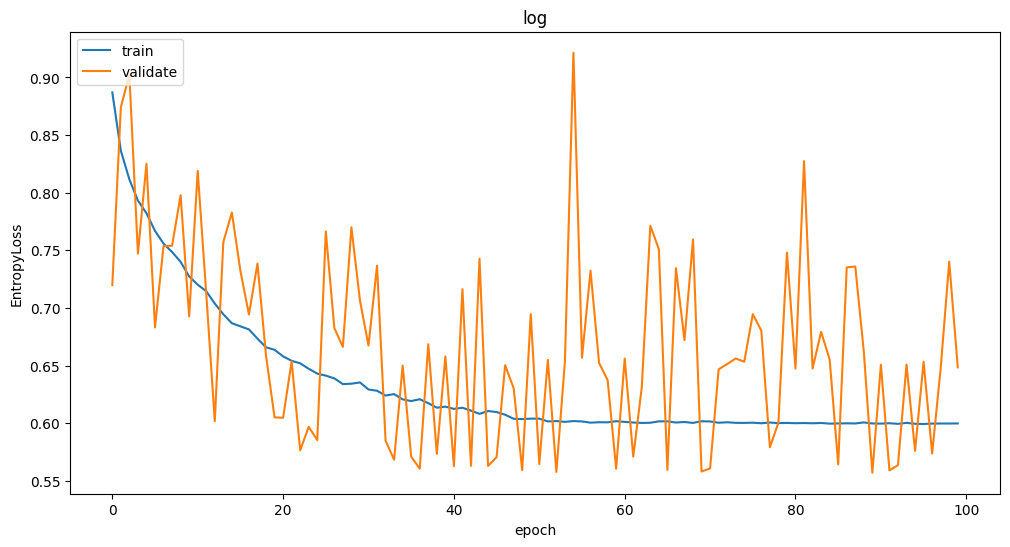

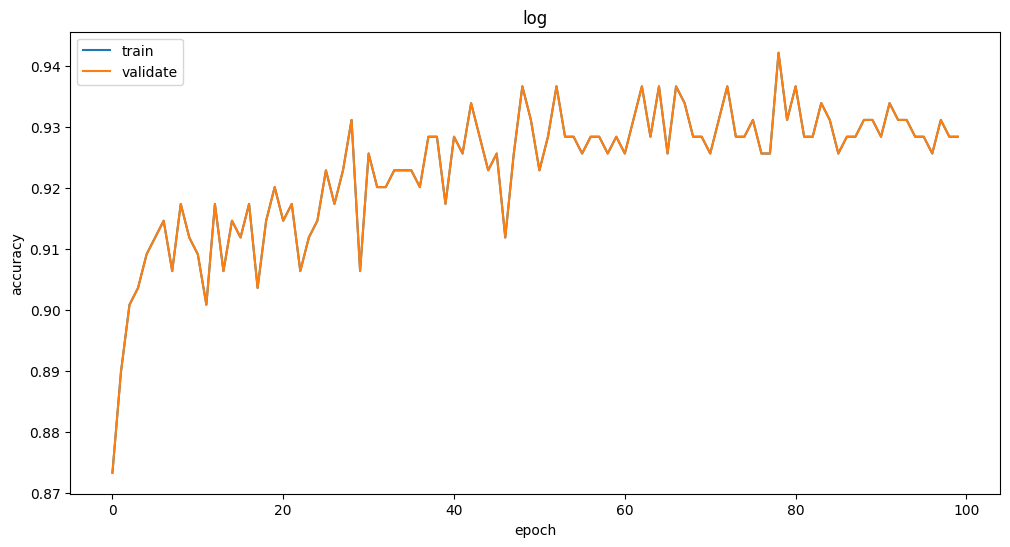

In [6]:
loss_train_1 = loss_train
loss_val_1 = loss_val 
loss_acc_1 = loss_acc

history_plot(loss_train_1,[loss_val_1[i].item() for i in range(len(loss_val_1))],'EntropyLoss')
history_plot(loss_acc_1,loss_acc_1,'accuracy')

# **Unet Classifier**

In [27]:
test_df = encoder_class(test_df)
test_df.head(5)

,filename,mask_filename,category,class
0,../dataset/image-all/85060120-183.png,../dataset/unet/images-mark/85060120-183.png,benign,1
1,../dataset/image-all/756fe311-a7.png,../dataset/unet/images-mark/756fe311-a7.png,benign,1
2,../dataset/image-all/4dd9d7f3-jg.png,../dataset/unet/images-mark/4dd9d7f3-jg.png,benign,1
3,../dataset/image-all/bbcc9757-nq.png,../dataset/unet/images-mark/bbcc9757-nq.png,benign,1
4,../dataset/image-all/ee340ded-qw.png,../dataset/unet/images-mark/ee340ded-qw.png,benign,1


In [55]:
# Load Model "UnetClassifier" form kernel In[4]
from Unet import UnetClassifier

loaded_model_state_dict = torch.load('../example/Unet/save-model/full-epochs-model-unet-classifier.pth')
model = UnetClassifier().to(DEVICE)
model.load_state_dict(loaded_model_state_dict)

<All keys matched successfully>

In [56]:
# Metrics Import
from sklearn.metrics import confusion_matrix
from torcheval.metrics.functional import multiclass_f1_score
from torcheval.metrics.functional import multiclass_precision
from torcheval.metrics.functional.classification import multiclass_recall

from torcheval.metrics.functional import multiclass_accuracy
from sklearn import metrics


test_loader = DataLoad.get_data(test_df,16)

num_class = 3
total_samples = 0
total_accuracy = 0  

y_true = []
y_pred = []

for image, label in test_loader:
    
    # define image and label dataset to 'cuda'
    image ,label = image.to(DEVICE) ,label.to(DEVICE)
    
    # model pred
    out = model(image)
    
    # get loss
    loss = loss_func(out, label)
    
    # เลือกสมาชิกใน tensor ที่มีความน่าจะเป็นสูงที่สุดจากชั้น output ของเลเยอร์ softmax ที่ส่งออกเป็นในรูป [nun_class] 
    output = (torch.max(torch.exp(out), 1)[1]).data.cpu().numpy()
    
    
    labels = label.data.cpu().numpy()
    
    y_pred.extend(output) 
    y_true.extend(labels) 
    
    total_samples += label.size(0)

eva = {"val_loss": loss}

# auc calculate
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_pred),np.array(y_true) , pos_label=2)
auc = metrics.auc(fpr, tpr)

# set y_pred , y_true to tensor for torcheval
y_pred = torch.tensor(y_pred)
y_true = torch.tensor(y_true)

# accuracy 
acc = multiclass_accuracy(y_pred, y_true , average="macro" , num_classes=num_class)

# f1-score
f1 = multiclass_f1_score(y_pred, y_true , average="macro" , num_classes=num_class)

# precision
prec = multiclass_precision(y_pred, y_true , average="macro", num_classes=num_class)

# recall
recall = multiclass_recall(y_pred, y_true , average="macro", num_classes=num_class)

print(f"test \nentropyloss:{eva['val_loss']:.4f} | accuracy:{acc.item():.4f} | f1-score:{f1.item():.4f}"
      f"| precision:{prec.item():.4f} | recall:{recall.item():.4f} | auc:{auc:.4f} ")

test 
entropyloss:0.7264 | accuracy:0.9242 | f1-score:0.9236| precision:0.9245 | recall:0.9242 | auc:0.9509 


In [57]:
class_map = {1:'benign', 2:'malignant', 0:'normal'}
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [class_map[i] for i in class_map], # 
                     columns = [class_map[i] for i in class_map])
print(cf_matrix)
df_cm

[[241   1   0]
 [  7 221  14]
 [  7  26 209]]


,benign,malignant,normal
benign,0.995868,0.004132,0.000000
malignant,0.028926,0.913223,0.057851
normal,0.028926,0.107438,0.863636


# **ResUnetClassifier**

ref : https://github.com/Dont-HurtMe/RES-UnetClassifier.git

In [39]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image

# generate & transform data
test_dataset = CustomGenerator(test_df, transform=transform)

# create DataLoader
batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [42]:
# Load Classifier model
classifier = torch.load('../example/Unet+ResnetClassifier/bestmodel-resnet50-classification.pth')

In [44]:
num_class = 3
total_samples = 0
total_accuracy = 0  

y_true = []
y_pred = []

for image, label in test_loader:
        
    image ,label = image.to(DEVICE) ,label.to(DEVICE)
        
    out = classifier(image)
    loss = loss_func(out, label)
    #acc = accuracy(out, label)
    output = (torch.max(torch.exp(out), 1)[1]).data.cpu().numpy()
    
    
    labels = label.data.cpu().numpy()
    
    y_pred.extend(output) 
    y_true.extend(labels) 
    
    total_samples += label.size(0)
    #total_accuracy += acc * label.size(0)

overall_accuracy = total_accuracy / total_samples
eva = {"val_loss": loss}


fpr, tpr, thresholds = metrics.roc_curve(np.array(y_pred),np.array(y_true) , pos_label=2)
auc = metrics.auc(fpr, tpr)

y_pred = torch.tensor(y_pred)
y_true = torch.tensor(y_true)

acc = multiclass_accuracy(y_pred, y_true , average="macro" , num_classes=num_class)
f1 = multiclass_f1_score(y_pred, y_true , average="macro" , num_classes=num_class)
prec = multiclass_precision(y_pred, y_true , average="macro", num_classes=num_class)
recall = multiclass_recall(y_pred, y_true , average="macro", num_classes=num_class)

print(f"test \nentropyloss:{eva['val_loss']:.4f} | accuracy:{acc.item():.4f} | f1-score:{f1.item():.4f}"
      f"| precision:{prec.item():.4f} | recall:{recall.item():.4f} | auc:{auc:.4f} ")

test 
entropyloss:0.0203 | accuracy:0.9793 | f1-score:0.9793| precision:0.9795 | recall:0.9793 | auc:0.9876 


In [45]:
class_map = {1:'benign', 2:'malignant', 0:'normal'}
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [class_map[i] for i in class_map], # 
                     columns = [class_map[i] for i in class_map])
print(cf_matrix)
df_cm

[[235   5   2]
 [  2 240   0]
 [  4   2 236]]


,benign,malignant,normal
benign,0.971074,0.020661,0.008264
malignant,0.008264,0.991736,0.000000
normal,0.016529,0.008264,0.975207
